In [33]:
import json
import pandas as pd

In [34]:
with open('result.json','r') as file:
    content = json.load(file,encoding="cp1252")
    

In [35]:
val_op_df = pd.json_normalize(content,'objects',['filename'],errors='ignore')

In [36]:
val_op_df

,class_id,name,confidence,relative_coordinates.left_x,relative_coordinates.top_y,relative_coordinates.width,relative_coordinates.height,filename
0,8,skirt,0.557432,-22,56,476,207,/content/gdrive/My Drive/darknet/val_test/0005...
1,8,skirt,0.852585,-10,188,449,311,/content/gdrive/My Drive/darknet/val_test/0005...
2,8,skirt,0.758594,-26,60,311,252,/content/gdrive/My Drive/darknet/val_test/0005...
3,1,long sleeve top,0.282696,45,-12,387,287,/content/gdrive/My Drive/darknet/val_test/0005...
4,8,skirt,0.885245,-24,121,514,315,/content/gdrive/My Drive/darknet/val_test/0005...
...,...,...,...,...,...,...,...,...
969,8,skirt,0.656691,-24,154,476,392,/content/gdrive/My Drive/darknet/val_test/0018...
970,1,long sleeve top,0.338348,-44,8,497,334,/content/gdrive/My Drive/darknet/val_test/0018...
971,1,long sleeve top,0.270404,-31,225,491,561,/content/gdrive/My Drive/darknet/val_test/0018...
972,0,short sleeve top,0.425889,109,266,354,359,/content/gdrive/My Drive/darknet/val_test/0018...


In [37]:
val_in_df = pd.read_csv(r'C:\Users\roshn\Documents\DataAnalytics\Springboard\CV_Fashion_dataset\test_for_confusion_matrix.csv')

In [38]:
val_in_df.head()

,Unnamed: 0,img_id,source,pair_id,item_no,segmentation,scale,viewpoint,zoom_in,landmarks,style,bounding_box,category_id,occlusion,category_name,path
0,4,3,user,3,1,"[[222.0721153846154, 252.40660866910866, 218.0...",1,2,1,"[220, 250, 1, 207, 246, 1, 211, 258, 1, 220, 2...",1,"[151, 241, 279, 435]",10,2,short sleeve dress,C:\Users\roshn\Documents\DataAnalytics\Springb...
1,5,4,user,3,1,"[[255.05865384615385, 215.81833028083028, 242....",1,3,1,"[255, 217, 1, 275, 214, 1, 0, 0, 0, 0, 0, 0, 0...",1,"[174, 205, 327, 393]",10,1,short sleeve dress,C:\Users\roshn\Documents\DataAnalytics\Springb...
2,6,5,user,4,1,"[[372.75801749271136, 63.616826322365675, 380....",3,2,2,"[426, 12, 1, 0, 0, 0, 346, 40, 2, 380, 70, 2, ...",1,"[48, 0, 467, 623]",1,1,short sleeve top,C:\Users\roshn\Documents\DataAnalytics\Springb...
3,7,6,user,5,1,"[[248.03809523809588, 224.3047619047617, 244.4...",2,2,1,"[268, 244, 1, 248, 225, 2, 242, 245, 2, 263, 2...",3,"[97, 218, 328, 567]",12,2,vest dress,C:\Users\roshn\Documents\DataAnalytics\Springb...
4,8,7,user,5,1,"[[217.4723861996587, 151.42636757182171, 219.3...",2,2,1,"[241, 159, 1, 218, 152, 2, 225, 168, 1, 243, 1...",3,"[144, 145, 338, 544]",12,2,vest dress,C:\Users\roshn\Documents\DataAnalytics\Springb...


In [39]:
val_in_short = val_in_df.loc[:,['path','category_id','category_name']]

In [40]:
val_in_short.head()

,path,category_id,category_name
0,C:\Users\roshn\Documents\DataAnalytics\Springb...,10,short sleeve dress
1,C:\Users\roshn\Documents\DataAnalytics\Springb...,10,short sleeve dress
2,C:\Users\roshn\Documents\DataAnalytics\Springb...,1,short sleeve top
3,C:\Users\roshn\Documents\DataAnalytics\Springb...,12,vest dress
4,C:\Users\roshn\Documents\DataAnalytics\Springb...,12,vest dress


In [41]:
val_op_short = val_op_df.loc[:,['filename','class_id','name','confidence']]

In [42]:
val_op_short.head()

,filename,class_id,name,confidence
0,/content/gdrive/My Drive/darknet/val_test/0005...,8,skirt,0.557432
1,/content/gdrive/My Drive/darknet/val_test/0005...,8,skirt,0.852585
2,/content/gdrive/My Drive/darknet/val_test/0005...,8,skirt,0.758594
3,/content/gdrive/My Drive/darknet/val_test/0005...,1,long sleeve top,0.282696
4,/content/gdrive/My Drive/darknet/val_test/0005...,8,skirt,0.885245


In [43]:
keys = list(val_in_short.category_name.unique())

In [44]:
mapping={}
for i in keys:
    mapping[i]=keys.index(i)

In [45]:
val_op_short['Y_hat']= val_op_short.name.map(mapping)

In [46]:
val_in_short['Y']=val_in_short.category_name.map(mapping)

In [47]:
import ntpath
val_in_short['id']=val_in_short.path.apply(lambda x: ntpath.basename(x))
val_op_short['id'] = val_op_short.filename.apply(lambda x : ntpath.basename(x))

In [48]:
comparative_idx = val_op_short.id.unique()

In [49]:
val_in_short = val_in_short[val_in_short.id.isin(comparative_idx)]

##### Now the dataframes are ready for comparison

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
val_op_edited = val_op_short.sort_values(by='confidence',ascending=False).drop_duplicates('id').sort_values(by='id')

In [52]:
dict_input_val ={}
for img in val_in_short.id:
    dict_input_val[img] = val_in_short[val_in_short.id == img].category_name.values[0]
val_op_edited['Y']= val_op_edited.id.map(dict_input_val)

In [54]:
val_op_edited.head()

,filename,class_id,name,confidence,Y_hat,id,Y
136,/content/gdrive/My Drive/darknet/val_test/0003...,11,vest dress,0.944473,2,000357.jpg,vest dress
134,/content/gdrive/My Drive/darknet/val_test/0003...,7,trousers,0.693726,5,000360.jpg,trousers
124,/content/gdrive/My Drive/darknet/val_test/0003...,7,trousers,0.956674,5,000361.jpg,trousers
132,/content/gdrive/My Drive/darknet/val_test/0003...,1,long sleeve top,0.301061,3,000362.jpg,vest dress
133,/content/gdrive/My Drive/darknet/val_test/0003...,1,long sleeve top,0.302286,3,000363.jpg,vest dress


In [55]:
confusion_matrix(val_op_edited.Y,val_op_edited.name)

array([[ 8,  1,  5,  3,  0,  9,  0,  8,  0,  1,  0,  0,  3],
       [ 0, 23,  5,  0,  0,  0,  0,  1,  0,  0,  2,  0,  1],
       [ 0, 19, 52,  0,  0, 44,  0,  6,  0,  0,  2,  0,  0],
       [ 0,  5, 14, 22,  0, 19,  0,  9,  0,  3,  1,  2, 16],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  7, 15,  2,  0, 91,  1,  7,  0,  0,  3,  0,  1],
       [ 0,  0,  1,  0,  0,  1,  7,  1,  0,  0, 21,  0,  1],
       [ 0,  2,  9,  0,  0,  2,  0, 37,  0,  0,  7,  0,  1],
       [ 0,  0,  2,  0,  0,  5,  0,  3,  0,  0,  1,  0,  0],
       [ 0,  3,  2,  2,  0,  3,  0,  8,  0,  1,  1,  1, 26],
       [ 0,  1,  1,  0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  3,  0,  0,  4,  0,  1,  0,  0,  1,  3,  4],
       [ 0,  4,  7,  4,  0, 13,  0, 21,  0,  4,  4,  8, 51]], dtype=int64)

In [78]:
cf_matrix=confusion_matrix(val_op_edited.Y,val_op_edited.name,labels=keys)

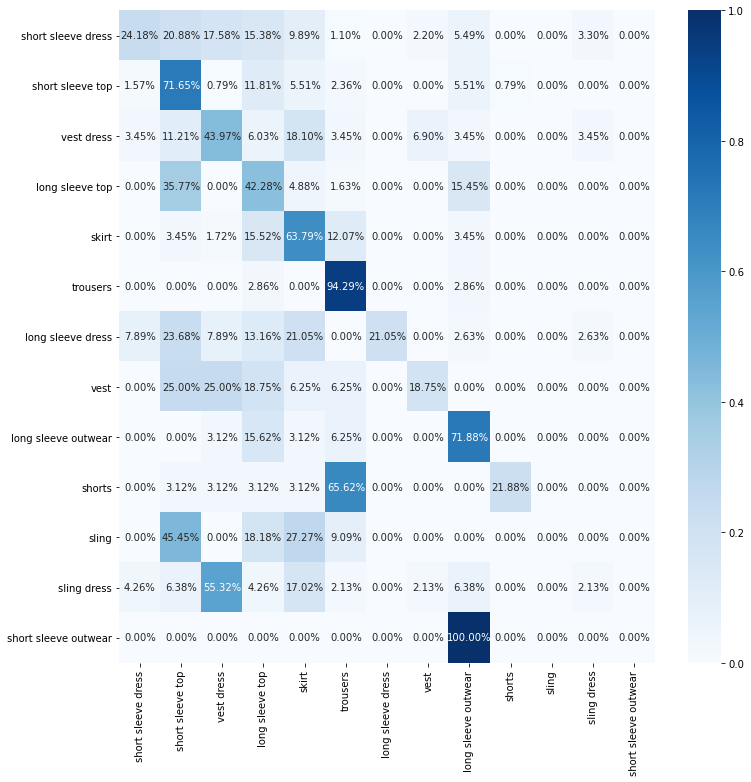

In [79]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(cf_matrix/np.sum(cf_matrix,axis=1).reshape(13,1),ax=ax, annot=True,fmt='.2%', cmap='Blues',cbar=True,xticklabels=keys, yticklabels=keys)

#### Since the output on the test data is not very accurate, checking the accuracy on train data

In [58]:
with open(r'C:\Users\roshn\Documents\DataAnalytics\Springboard\CV_Fashion_dataset\GUI_And_test_images\json_for_test\result_train1.json','r') as file:
    content = json.load(file,encoding="cp1252")
train_output1 = pd.json_normalize(content,'objects',['filename'],errors='ignore')

In [59]:
train_output1.shape

(1412, 8)

In [60]:
with open(r'C:\Users\roshn\Documents\DataAnalytics\Springboard\CV_Fashion_dataset\GUI_And_test_images\json_for_test\result_train2.json','r') as file:
    content = json.load(file,encoding="cp1252")
train_output2 = pd.json_normalize(content,'objects',['filename'],errors='ignore')

In [61]:
train_output2.shape

(1267, 8)

In [62]:
train_input = pd.read_csv(r'C:\Users\roshn\Documents\DataAnalytics\Springboard\CV_Fashion_dataset\train_input_for_test.csv')

In [63]:
train_input.shape

(4274, 17)

In [64]:
train_input = train_input.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [65]:
train_input.head()

,img_id,source,pair_id,item_no,segmentation,scale,viewpoint,zoom_in,landmarks,style,bounding_box,category_id,occlusion,category_name,path
0,3,user,2,1,"[[338, 64, 299, 133, 228, 189, 183, 121, 160, ...",3,1,2,"[240, 108, 2, 160, 63, 2, 183, 121, 2, 228, 18...",1,"[1, 52, 467, 831]",11,1,long sleeve dress,C:\Users\roshn\Documents\DataAnalytics\Springb...
1,4,user,2,1,"[[266, 160, 257, 191, 233, 218, 184, 210, 149,...",3,2,2,"[223, 187, 1, 149, 190, 2, 184, 210, 2, 233, 2...",1,"[0, 113, 467, 623]",11,1,long sleeve dress,C:\Users\roshn\Documents\DataAnalytics\Springb...
2,5,user,2,1,"[[204.0, 143.0, 182.0, 137.0, 167.0, 130.0, 16...",3,1,2,"[205, 143, 2, 162, 129, 2, 192, 164, 2, 222, 1...",1,"[1, 98, 467, 814]",11,1,long sleeve dress,C:\Users\roshn\Documents\DataAnalytics\Springb...
3,6,user,2,1,"[[126.9, 309.75, 79.29, 311.32, 52.0, 318.0, 3...",3,2,2,"[207, 336, 1, 145, 339, 1, 188, 375, 1, 239, 3...",1,"[0, 324, 466, 831]",11,3,long sleeve dress,C:\Users\roshn\Documents\DataAnalytics\Springb...
4,7,shop,2,1,"[[269, 122, 251, 143, 218, 157, 189, 142, 173,...",3,1,1,"[225, 117, 1, 173, 120, 2, 189, 142, 2, 218, 1...",2,"[23, 106, 430, 696]",11,1,long sleeve dress,C:\Users\roshn\Documents\DataAnalytics\Springb...


In [66]:
train_output1=train_output1.loc[:,['name','confidence','filename']]

In [67]:
train_output2 = train_output2.loc[:,['name','confidence','filename']]

In [68]:
train_output1['Y']= train_output1.name.map(mapping)
train_output2['Y']= train_output2.name.map(mapping)


In [69]:
train_output1['id']=train_output1.filename.apply(lambda x: ntpath.basename(x))
train_output2['id']=train_output1.filename.apply(lambda x: ntpath.basename(x))
train_input['id']=train_input.path.apply(lambda x: ntpath.basename(x))

In [70]:
train_input=  train_input.loc[:,['id','category_name']]
train_input['Y']= train_input.category_name.map(mapping)

In [71]:
train_output1 = train_output1.sort_values(by='confidence',ascending=False).drop_duplicates('id').sort_values(by='id')
train_output2 = train_output2.sort_values(by='confidence',ascending=False).drop_duplicates('id').sort_values(by='id')

In [72]:
dict_input ={}
for img in train_input.id:
    dict_input[img] = train_input[train_input.id == img].category_name.values[0]
train_output1['Y_hat']= train_output1.id.map(dict_input)
train_output2['Y_hat']= train_output2.id.map(dict_input)


Now the training data is ready for testing. Below is the comparison -

In [73]:
cf_matrix=confusion_matrix(train_output1.Y_hat,train_output1.name,labels=keys)

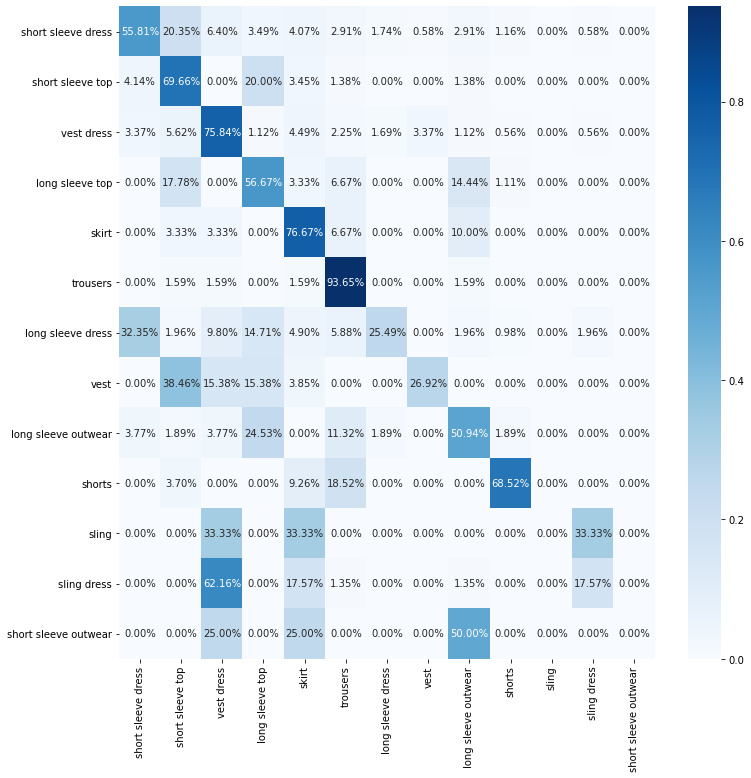

In [74]:
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(cf_matrix/np.sum(cf_matrix,axis=1).reshape(13,1),ax=ax, annot=True,fmt='.2%', cmap='Blues',cbar=True,xticklabels=keys, yticklabels=keys)

#### Comparison metrics

In [75]:
from sklearn.metrics import accuracy_score

In [117]:
acc_score = accuracy_score(train_output1.Y_hat,train_output1.name)

In [118]:
acc_score

0.5784708249496981

In [80]:
acc_score_val = accuracy_score(val_op_edited.Y,val_op_edited.name)

In [81]:
acc_score_val

0.4511691884456671

In [121]:
train_output1.iloc[:40,]

,name,confidence,filename,Y,id,Y_hat
1296,long sleeve top,0.367062,/content/gdrive/My Drive/darknet/train_img/000...,3,000004.jpg,long sleeve dress
1307,long sleeve outwear,0.465453,/content/gdrive/My Drive/darknet/train_img/000...,8,000006.jpg,long sleeve dress
1311,shorts,0.489886,/content/gdrive/My Drive/darknet/train_img/000...,9,000007.jpg,long sleeve dress
1313,long sleeve top,0.278397,/content/gdrive/My Drive/darknet/train_img/000...,3,000008.jpg,long sleeve dress
1306,trousers,0.539863,/content/gdrive/My Drive/darknet/train_img/000...,5,000009.jpg,long sleeve top
1294,skirt,0.409917,/content/gdrive/My Drive/darknet/train_img/000...,4,000010.jpg,long sleeve top
1290,long sleeve top,0.390940,/content/gdrive/My Drive/darknet/train_img/000...,3,000015.jpg,long sleeve top
1293,trousers,0.425413,/content/gdrive/My Drive/darknet/train_img/000...,5,000020.jpg,long sleeve top
1291,shorts,0.858741,/content/gdrive/My Drive/darknet/train_img/000...,9,000033.jpg,shorts
1298,shorts,0.875010,/content/gdrive/My Drive/darknet/train_img/000...,9,000037.jpg,shorts


In [122]:
with open(r'C:\Users\roshn\Documents\DataAnalytics\Springboard\CV_Fashion_dataset\GUI_And_test_images\json_for_test\result_train1.json','r') as file:
    content = json.load(file,encoding="cp1252")
train_output_full = pd.json_normalize(content,'objects',['filename'],errors='ignore')

In [124]:
train_output_full['id']=train_output_full.filename.apply(lambda x: ntpath.basename(x))

In [125]:
train_output_full = train_output_full.loc[:,['id','name','confidence']]

In [128]:
train_output_full.sort_values(by='id')iloc[:60,]

,id,name,confidence
1297,000004.jpg,short sleeve top,0.332105
1296,000004.jpg,long sleeve top,0.367062
1307,000006.jpg,long sleeve outwear,0.465453
1312,000007.jpg,long sleeve top,0.359007
1311,000007.jpg,shorts,0.489886
1313,000008.jpg,long sleeve top,0.278397
1306,000009.jpg,trousers,0.539863
1295,000010.jpg,short sleeve top,0.383009
1294,000010.jpg,skirt,0.409917
1290,000015.jpg,long sleeve top,0.390940


In [135]:
short_sleeve_dresses = val_op_edited[val_op_edited.Y=='short sleeve dress']

In [136]:
dict_input_val ={}
for img in val_in_short.id:
    dict_input_val[img] = val_in_short[val_in_short.id == img].category_name.values[0]

In [141]:
train_input[train_input.category_name=='vest dress'].iloc[:40,]

,id,category_name,Y
29,000143.jpg,vest dress,2
30,000144.jpg,vest dress,2
31,000145.jpg,vest dress,2
32,000146.jpg,vest dress,2
33,000147.jpg,vest dress,2
34,000148.jpg,vest dress,2
35,000149.jpg,vest dress,2
36,000150.jpg,vest dress,2
37,000151.jpg,vest dress,2
38,000152.jpg,vest dress,2
